In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
class FieldCoefBean:
    def __init__(self):
        self._mfields= {}
        self._n= 0
    
    def add(self, field_name, coef):
        mfields= self._mfields
        #
        dvalue= None
        if field_name in mfields:
            dvalue= mfields[field_name]
        else:
            dvalue= 0.
            mfields[field_name]= dvalue
        dvalue += coef
        mfields[field_name]= dvalue    
        #
        self._n += 1
    
    def get_results(self):
        results= []
        for k, v in self._mfields.iteritems():
            results.append((k,v))
        return results

In [4]:
partitions= ['wkday','wkend']
years= [2008, 2009, 2010, 2011, 2013, 2014]
partitions_result_map= {}
for p in partitions:
    a_struct= FieldCoefBean()
    partitions_result_map[p]= a_struct
    #
    for y in years:
        s= './data/regression/elastic_net_{}_{}_results.csv'.format(y, p)
        a_df= pd.read_csv(s, header=None, names=['field_name', 'coef'])
        for _, row in a_df.iterrows():
            field_name= row[0]
            coef= row[1]
            #
            a_struct.add(field_name, coef)

In [5]:
dfs= {}
for p in partitions:
    names= []
    values= []
    is_negative= []
    a_struct= partitions_result_map[p]
    #
    a_results= a_struct.get_results()
    for e in a_results:
        names.append(e[0])
        is_negative.append(e[1] < 0.)
        values.append(abs(e[1]))
        
    dfs[p]= pd.DataFrame.from_records(data={'coef_name':names, 'coef_value':values, 'negative': is_negative})

In [6]:
num_coef= 20

('Field_sourceCol_NUM_LANES_value_2', 1.0, 'blue')
('Field_sourceCol_NUM_LANES_value_5', 0.9060320042799145, 'red')
('Field_sourceCol_DISTRICT_ID_value_4', 0.7275264587259967, 'blue')
('Field_sourceCol_NUM_LANES_value_6', 0.7154612000454904, 'red')
('Field_sourceCol_NUM_LANES_value_3', 0.6315148034713433, 'blue')
('LAT', 0.5052543235355507, 'red')
('Field_sourceCol_DISTRICT_ID_value_7', 0.4750507578719834, 'red')
('Field_sourceCol_NUM_LANES_value_1', 0.4674091742093299, 'blue')
('Field_sourceCol_DISTRICT_ID_value_12', 0.45221849089795113, 'red')
('Field_sourceCol_FWY_NUM_value_30', 0.430187238814, 'blue')
('DENSITY', 0.42012949046536063, 'red')
('Field_sourceCol_FWY_NUM_value_41', 0.41813860655852814, 'blue')
('Field_sourceCol_FWY_NUM_value_241', 0.41222967067621236, 'blue')
('Field_sourceCol_FWY_NUM_value_73', 0.41100138868096353, 'blue')
('Field_sourceCol_NUM_LANES_value_4', 0.31990781894614356, 'red')
('Field_sourceCol_DISTRICT_ID_value_3', 0.28221397567134754, 'blue')
('Field_sourc

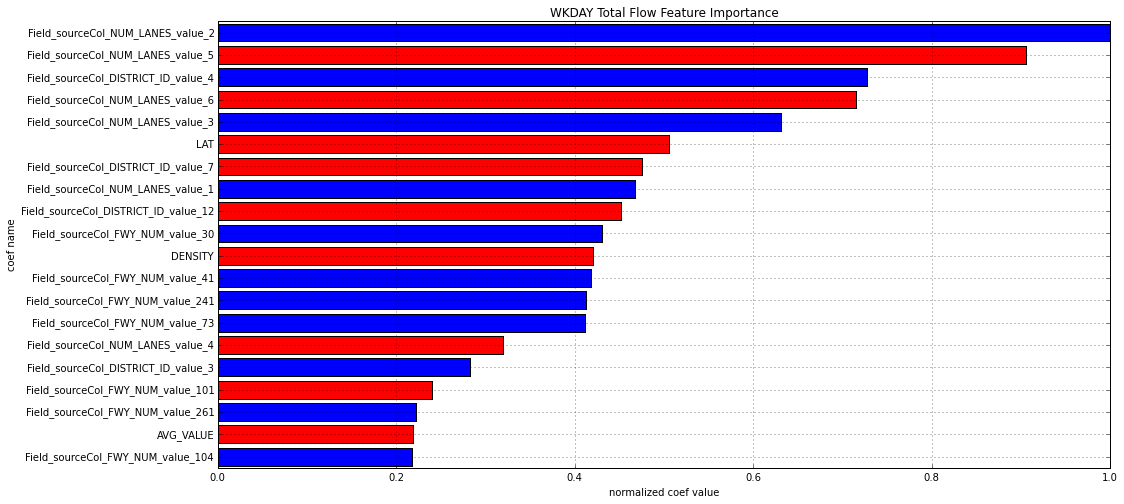

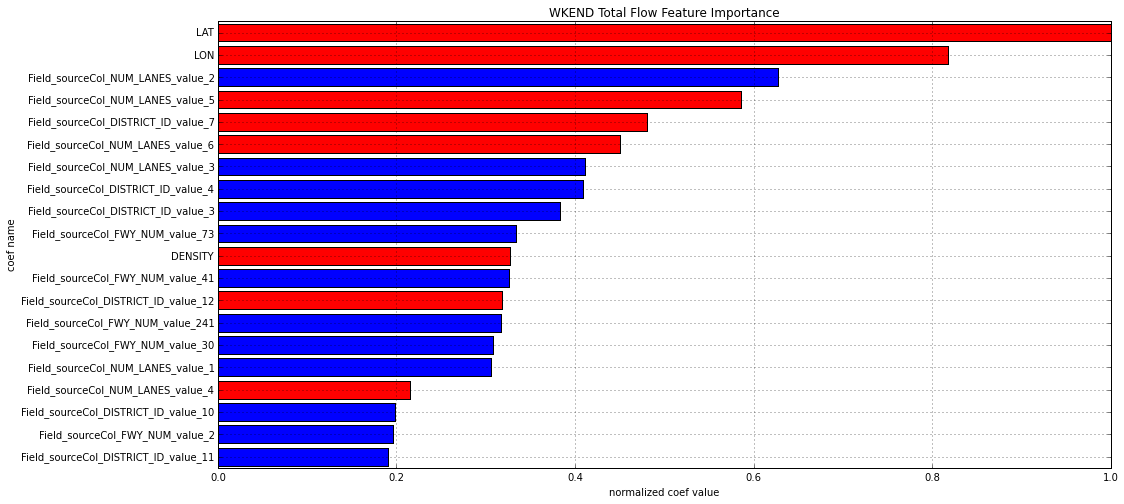

In [7]:
for p in partitions:
    working_df= dfs[p]
    working_df.dropna(inplace=True)
    m_max= working_df.coef_value.max()
    working_df['normalized_coef_value']= working_df.coef_value / m_max
    working_df.sort('normalized_coef_value', ascending=False, inplace=True)
    #
    labels=[]
    y= []
    c= []
    i= 0
    for _, row in working_df.iterrows():
        #
        label= row['coef_name']
        value= row['normalized_coef_value']
        color= 'blue' if row['negative'] else 'red'
        print(label, value, color)
        #
        labels.append(label)
        y.append(value)
        c.append(color)
        #
        i+= 1
        if i == num_coef:
            break

    new_labels= list(labels)
    new_labels.reverse()
    new_y= list(y)
    new_y.reverse()
    new_c= list(c)
    new_c.reverse()
    val = new_y
    pos = arange(len(y))+.5    # the bar centers on the y axis

    fig, ax= plt.subplots(figsize=(16,8))
    h= ax.barh(pos,val, color=new_c, align='center')
    ax.set_yticks(pos)
    ax.set_yticklabels(new_labels)
    ax.set_xlabel('normalized coef value')
    ax.set_ylabel('coef name')
    ax.set_title('{} Total Flow Feature Importance'.format(p.upper()))
    ax.grid(True)